In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

df = pd.read_csv('data/data.csv')

df.head()

,Unnamed: 0,id,bathrooms,bedrooms,fee,price,square_feet,cityname,state,latitude,longitude,date,price_per_square_ft
0,0,5668640009,1.0,1.0,No,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,2019-12-26,4.049815
1,1,5668639818,1.5,3.0,No,1250.0,1500,Newport News,VA,37.0867,-76.4941,2019-12-26,0.833333
2,2,5668639686,2.0,3.0,No,1395.0,1650,Raleigh,NC,35.8230,-78.6438,2019-12-26,0.845455
3,3,5668639659,1.0,2.0,No,1600.0,820,Vacaville,CA,38.3622,-121.9712,2019-12-26,1.951220
4,4,5668639374,1.0,1.0,No,975.0,624,Albuquerque,NM,35.1038,-106.6110,2019-12-26,1.562500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99004 entries, 0 to 99003
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           99004 non-null  int64  
 1   id                   99004 non-null  int64  
 2   bathrooms            99004 non-null  float64
 3   bedrooms             99004 non-null  float64
 4   fee                  99004 non-null  object 
 5   price                99004 non-null  float64
 6   square_feet          99004 non-null  int64  
 7   cityname             99004 non-null  object 
 8   state                99004 non-null  object 
 9   latitude             99004 non-null  float64
 10  longitude            99004 non-null  float64
 11  date                 99004 non-null  object 
 12  price_per_square_ft  99004 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 9.8+ MB


In [3]:
##pulling info for potentially interesting regressions to compare

In [4]:
df.state.unique()

array(['CA', 'VA', 'NC', 'NM', 'CO', 'WV', 'GA', 'MA', 'DC', 'AZ', 'IA',
       'WA', 'TX', 'IL', 'MS', 'OR', 'FL', 'MO', 'PA', 'WI', 'OK', 'UT',
       'RI', 'NJ', 'IN', 'MD', 'OH', 'TN', 'ND', 'NE', 'AR', 'MI', 'MN',
       'HI', 'ID', 'SC', 'KS', 'AL', 'SD', 'NY', 'KY', 'LA', 'AK', 'CT',
       'NV', 'WY', 'VT', 'NH', 'MT', 'DE', 'ME'], dtype=object)

In [5]:
df['price_per_square_ft'].nunique()

63315

In [6]:
df.bedrooms.unique()

array([1., 3., 2., 4., 0., 5., 7., 8., 6., 9.])

In [7]:
##which state has the most info?

df.state.value_counts().head(15)

state
TX    11236
CA    10254
VA     8281
NC     6298
CO     6280
FL     5768
MD     5276
MA     5026
OH     4902
GA     4752
NJ     4442
NV     2812
WA     2593
AZ     2375
LA     1344
Name: count, dtype: int64

In [8]:
##A regression on bathrooms vs price could be interesting. Creating an easy dataframe of just average price per amount of bathrooms to work with

avg_bath_price = df.groupby('bathrooms').agg({'price' : 'mean'})
avg_bath_price

,price
bathrooms,
1.0,1336.463604
1.5,1393.303701
2.0,1728.899671
2.5,2097.802224
3.0,2803.398649
3.5,2907.652174
4.0,4666.957983
4.5,5138.666667
5.0,9692.500000


In [9]:
##Same as above with bathrooms

avg_bed_price = df.groupby('bedrooms').agg({'price' : 'mean'})
avg_bed_price

,price
bedrooms,
0.0,1409.609302
1.0,1344.456798
2.0,1578.172468
3.0,1791.584054
4.0,2349.959115
5.0,3524.179577
6.0,7567.934783
7.0,14263.750000
8.0,5015.000000


In [10]:
##ENDED UP NOT USING THESE CAUSE SEABORN IS BETTER LOOKING

##finding the regression

x_values = avg_bed_price.index
y_values = avg_bed_price['price']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

<function matplotlib.pyplot.show(close=None, block=None)>

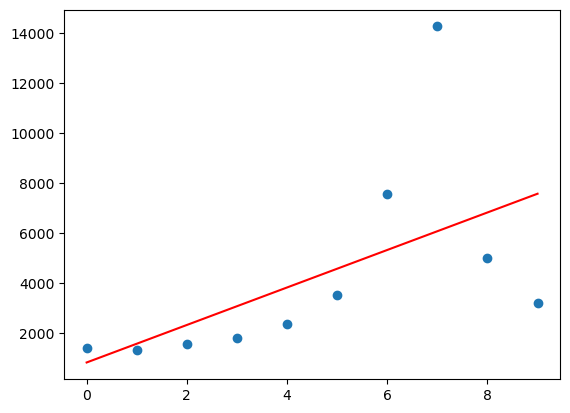

In [11]:
##adding the regression line

plt.scatter(avg_bed_price.index, avg_bed_price.price)
plt.plot(x_values, intercept + slope * x_values, label='Regression Line', color='red')

plt.show

[Text(0.5, 1.0, 'Price Based on Geographical Longitude'),
 Text(0.5, 0, 'Longitude Cordinates'),
 Text(0, 0.5, 'Price')]

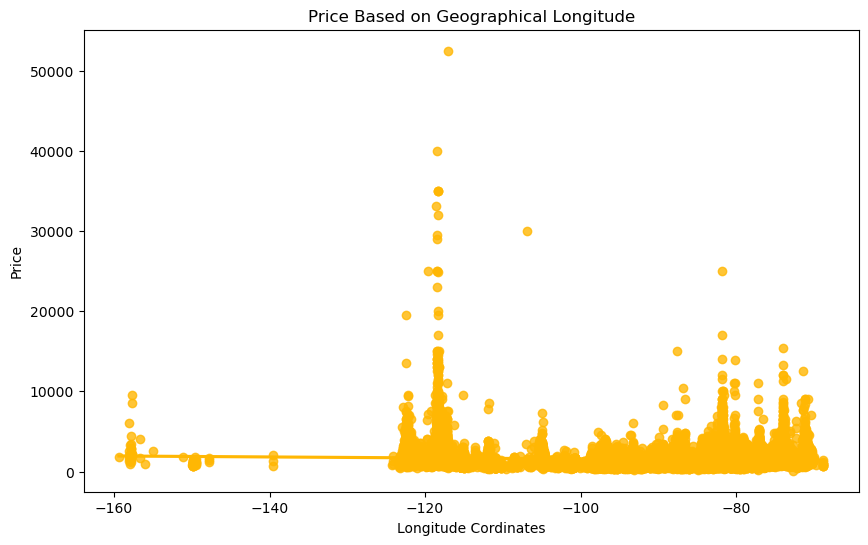

In [12]:
##Geographical regressions
##I chose these variables because its something our presentation has not covered yet.

plt.figure(figsize = (10, 6))
sns.regplot(data = df, x='longitude', y='price', color='#FFB703').set(title='Price Based on Geographical Longitude', xlabel='Longitude Cordinates', ylabel='Price')

In [13]:
##testing if a graph using averages is easier to read but still accurate to the true data

long_df = df.groupby('longitude').agg({'price' : 'mean'}).reset_index()

[Text(0.5, 1.0, ' Average Price Based on Geographical Longitude'),
 Text(0.5, 0, 'Longitude Cordinates'),
 Text(0, 0.5, 'Price')]

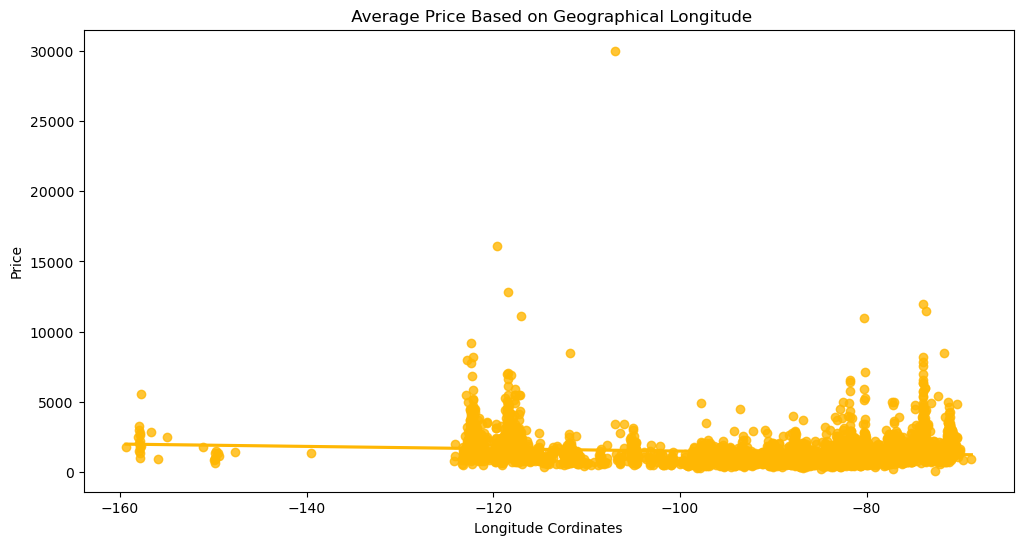

In [14]:
plt.figure(figsize = (12, 6))
sns.regplot(data = long_df, x='longitude', y='price', color='#FFB703').set(title=' Average Price Based on Geographical Longitude', xlabel='Longitude Cordinates', ylabel='Price')

[Text(0.5, 1.0, 'Price Based on Geographical Latitude'),
 Text(0.5, 0, 'Latitude Cordinates'),
 Text(0, 0.5, 'Price')]

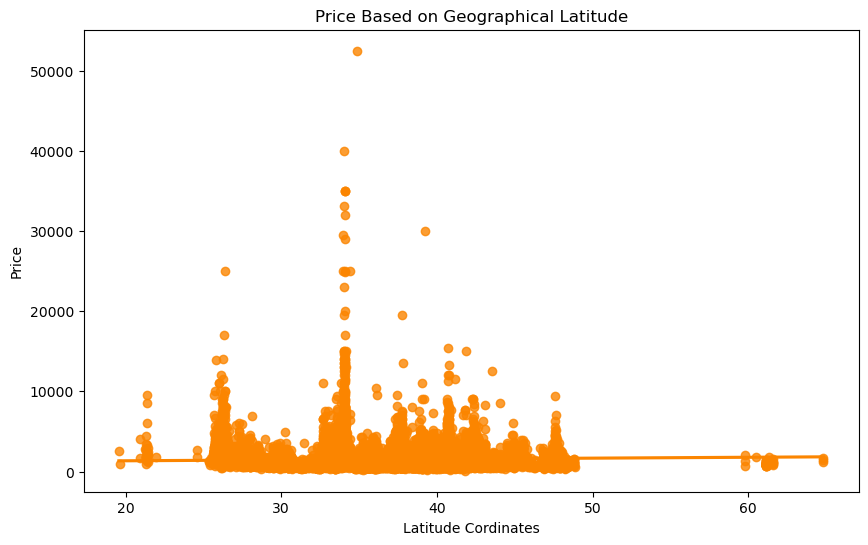

In [15]:
plt.figure(figsize = (10, 6))

sns.regplot(data = df, x='latitude', y='price', color = '#FB8500').set(title='Price Based on Geographical Latitude', xlabel='Latitude Cordinates', ylabel='Price')

In [16]:
lat_df = df.groupby('latitude').agg({'price' : 'mean'}).reset_index()

[Text(0.5, 1.0, 'Average Price Based on Geographical Latitude'),
 Text(0.5, 0, 'Latitude Cordinates'),
 Text(0, 0.5, 'Price')]

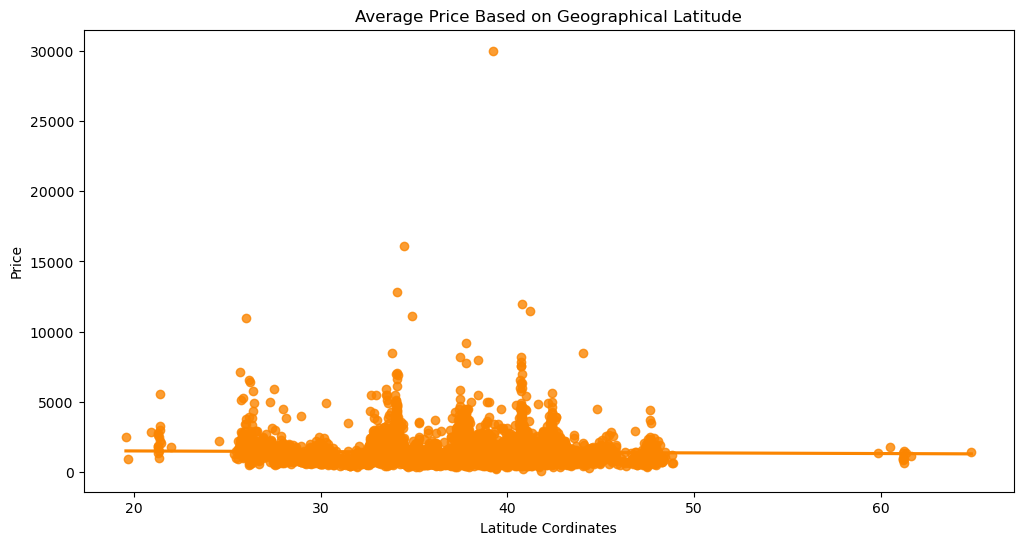

In [17]:
plt.figure(figsize = (12, 6))

sns.regplot(data = lat_df, x='latitude', y='price', color = '#FB8500').set(title='Average Price Based on Geographical Latitude', xlabel='Latitude Cordinates', ylabel='Price')

In [18]:
##Creating a data set with info of bathrooms based on averages

In [19]:
bath_df = df.groupby('bathrooms').agg({'price' : 'mean', 'square_feet' : 'mean'}).reset_index()

[Text(0.5, 1.0, 'Average Square Feet Based on Amount of Bathrooms'),
 Text(0.5, 0, 'Square Feet'),
 Text(0, 0.5, 'Bathrooms')]

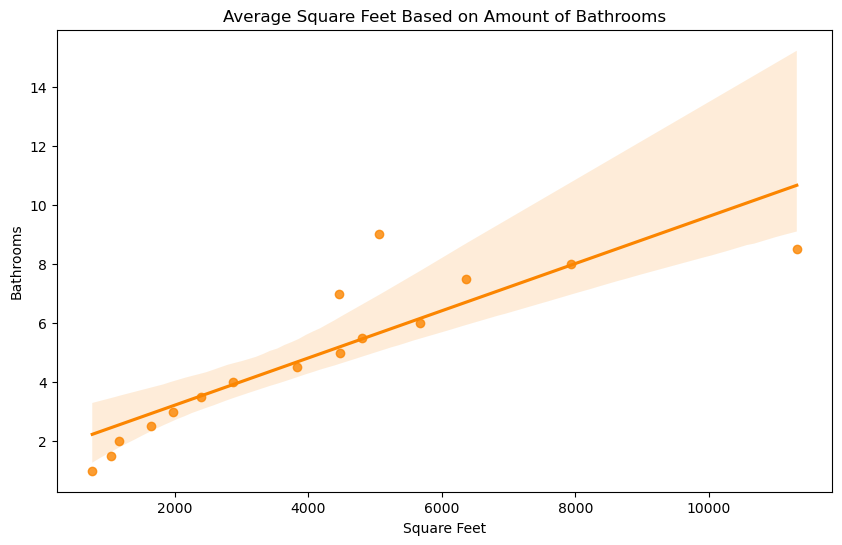

In [20]:
plt.figure(figsize = (10, 6))

sns.regplot(data = bath_df, x='square_feet', y='bathrooms', color = '#FB8500').set(title='Average Square Feet Based on Amount of Bathrooms', xlabel='Square Feet', ylabel='Bathrooms')


In [21]:
bed_df = df.groupby('bedrooms').agg({'price' : 'mean', 'square_feet' : 'mean'}).reset_index()

[Text(0.5, 1.0, 'Average Square Feet Based on Amount of Bedrooms'),
 Text(0.5, 0, 'Square Feet'),
 Text(0, 0.5, 'Bedrooms')]

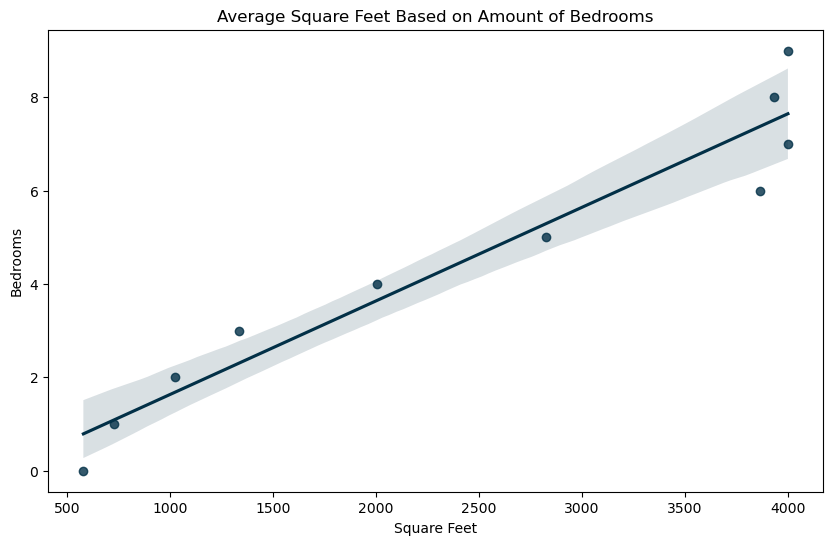

In [22]:
plt.figure(figsize = (10, 6))

sns.regplot(data = bed_df, x='square_feet', y='bedrooms', color = '#023047').set(title='Average Square Feet Based on Amount of Bedrooms', xlabel='Square Feet', ylabel='Bedrooms')


In [23]:
##While the graphs above shows a general regression of averages, it would be more true to the data to not take an average since our data set is so large

In [24]:
dates_df = df.groupby('date').agg({'price' : 'mean'}).reset_index()
dates_df.head()

,date,price
0,2018-12-07,1608.080870
1,2018-12-08,1439.190149
2,2018-12-09,1557.500000
3,2018-12-10,1450.000000
4,2018-12-11,1387.500000


In [25]:
##Two variables that have not been compared yet are amount of bedrooms and bathrooms

[Text(0.5, 1.0, 'Bedrooms vs Bathrooms'),
 Text(0.5, 0, 'Amount of Bedrooms'),
 Text(0, 0.5, 'Amount of Bathrooms')]

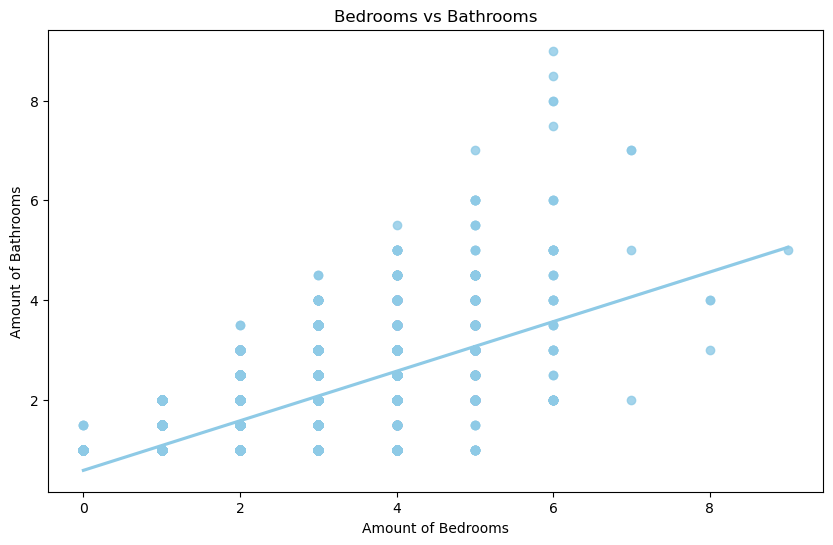

In [26]:
plt.figure(figsize = (10, 6))

sns.regplot(data = df, x='bedrooms', y='bathrooms', color = '#8ECAE6').set(title = 'Bedrooms vs Bathrooms', xlabel = 'Amount of Bedrooms', ylabel = 'Amount of Bathrooms')

In [27]:
df.bedrooms.unique()

array([1., 3., 2., 4., 0., 5., 7., 8., 6., 9.])

In [28]:
df.bathrooms.unique()

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 7. , 4.5, 5. , 8. , 8.5, 6. ,
       5.5, 9. , 7.5])

In [29]:
beds_baths_max = df.groupby('bedrooms').agg({'bathrooms' : 'max'}).reset_index()
beds_baths_max

,bedrooms,bathrooms
0,0.0,1.5
1,1.0,2.0
2,2.0,3.5
3,3.0,4.5
4,4.0,5.5
5,5.0,7.0
6,6.0,9.0
7,7.0,7.0
8,8.0,4.0
9,9.0,5.0


In [30]:
beds_baths_min = df.groupby('bedrooms').agg({'bathrooms' : 'min'}).reset_index()
beds_baths_min

,bedrooms,bathrooms
0,0.0,1.0
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0
5,5.0,1.0
6,6.0,2.0
7,7.0,2.0
8,8.0,3.0
9,9.0,5.0


[Text(0.5, 1.0, 'Average Bedrooms Based on Square Feet'),
 Text(0.5, 0, 'Square Feet'),
 Text(0, 0.5, 'Bedrooms')]

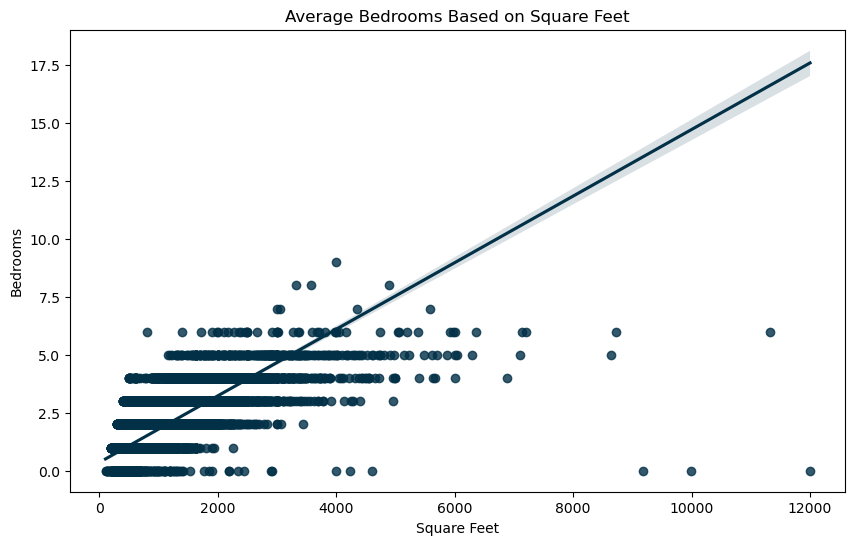

In [31]:
####I feel like to be more true to the data I should make charts not based on average
plt.figure(figsize = (10, 6))
sns.regplot(data = df, x='square_feet', y='bedrooms', color = '#023047').set(title='Average Bedrooms Based on Square Feet', xlabel='Square Feet', ylabel='Bedrooms')

[Text(0.5, 1.0, 'Average Bathrooms Based on Square Feet'),
 Text(0.5, 0, 'Square Feet'),
 Text(0, 0.5, 'Bathrooms')]

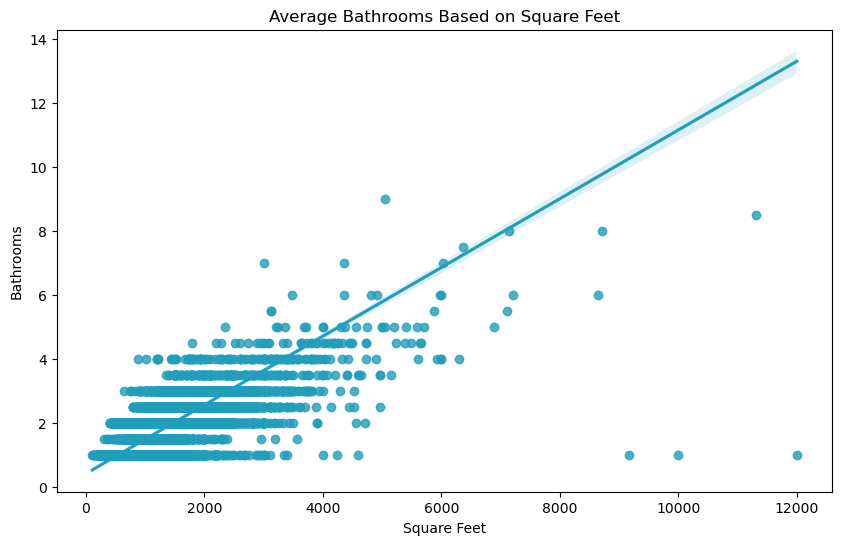

In [32]:
plt.figure(figsize = (10, 6))

sns.regplot(data = df, x='square_feet', y='bathrooms', color = '#219EBC').set(title='Average Bathrooms Based on Square Feet', xlabel='Square Feet', ylabel='Bathrooms')

In [33]:
###Below is mostly drafts not used in final presentation

<Axes: xlabel='price', ylabel='bathrooms'>

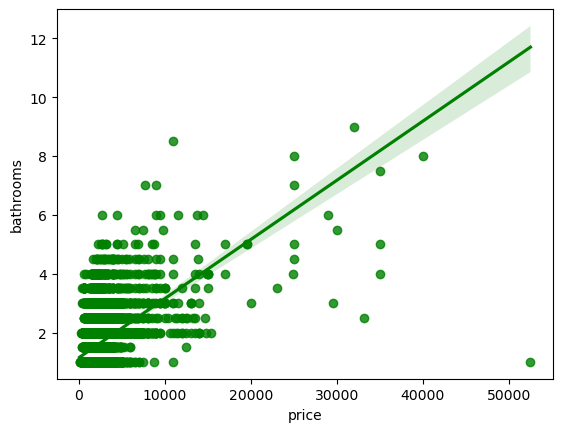

In [34]:
##Shows that the more rent you are paying the more bathrooms you likely have, probably will not use in final presentation

sns.regplot(data = df, x='price', y='bathrooms', color = 'green')

In [35]:
##get avg info for each state 
##having an average info for each state may make the charts easier to read

avg_df = df.groupby('state').agg({'price' : 'mean', 'bedrooms' : 'mean', 'price_per_square_ft' : 'mean', 'bathrooms' : 'mean', 'price_per_square_ft' : 'mean', 'square_feet' : 'mean'})
avg_df.head()

,price,bedrooms,price_per_square_ft,bathrooms,square_feet
state,,,,,
AK,1054.280702,1.701754,1.530507,1.236842,798.175439
AL,962.176136,1.917614,0.965194,1.549716,1039.599432
AR,874.367893,1.819398,0.930098,1.556856,971.740803
AZ,1120.110737,1.738947,1.270741,1.488421,913.647158
CA,2465.646187,1.663741,2.795014,1.456651,926.831090


In [36]:
avg_df_2 = df.groupby('state').agg({'price' : 'mean', 'bedrooms' : 'mean', 'price_per_square_ft' : 'mean', 'bathrooms' : 'mean', 'price_per_square_ft' : 'mean', 'square_feet' : 'mean', 'latitude' : 'mean', 'longitude' : 'mean'})
avg_df_2.head()

,price,bedrooms,price_per_square_ft,bathrooms,square_feet,latitude,longitude
state,,,,,,,
AK,1054.280702,1.701754,1.530507,1.236842,798.175439,61.332114,-149.154158
AL,962.176136,1.917614,0.965194,1.549716,1039.599432,33.182629,-86.742724
AR,874.367893,1.819398,0.930098,1.556856,971.740803,35.183713,-92.692253
AZ,1120.110737,1.738947,1.270741,1.488421,913.647158,33.200526,-111.727111
CA,2465.646187,1.663741,2.795014,1.456651,926.831090,34.538250,-118.569376


<Axes: xlabel='bathrooms', ylabel='bedrooms'>

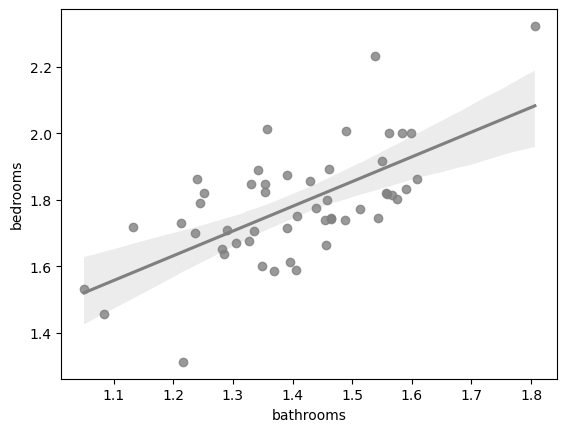

In [37]:
sns.regplot(data = avg_df, x='bathrooms', y='bedrooms', color='grey')